In [1]:
import os
import numpy as np
import scipy.misc as smp
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter
from matplotlib.image import NonUniformImage



plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 15})


In [33]:
file_name = 'pd_snap.dat'

Data = {}
with open(file_name) as f:
    lines = [line for line in f]
    for x in lines:
        info = x.strip().split('=')
        ind = tuple([float(y) for y in info[0][1:-2].split(',')])
        val = tuple([float(y) for y in info[1][2:-1].split(',')])
        Data[ind] = val
        

In [31]:
#[alpha, b, lambda, m, delta, rho]

def one_graph(Data,others,pinfo,need_x = True,need_y =True, xinfo = '', yinfo = ''):
    #others = [a,b,c,-1,d,-1]
    Labels = [r'$\alpha$','b',r'$\lambda$','m',r'$\delta$',r'$\rho$']
    two_dim = [index for index,value in enumerate(others) if value == -1]
    for ind in Data:
        continue_next = False
        for i in range(len(others)):
            if others[i] != -1 and others[i] != ind[i]:
                continue_next = True
        if continue_next:
            continue
        col = []
        for i in range(3):
            col.append(0.95 if Data[ind][i] >= 0.01 else 0.2)
#            col.append(Data[ind][i])
        col[1], col[2] = col[2],col[1]
        pinfo.scatter(ind[two_dim[1]],ind[two_dim[0]],marker='s', color = tuple(col),linewidth=2)
    if need_x:
        pinfo.set_xlabel( Labels[two_dim[1]] + '\n' + xinfo)
    if need_y:
        pinfo.set_ylabel( Labels[two_dim[0]], rotation = 0)
        if two_dim[1] == 1:
            pinfo.text(0,0.5,yinfo)
        elif two_dim[0] == 1:
            pinfo.text(-1,1.5,yinfo)            
        else:
            pinfo.text(-1,0.5,yinfo)
        

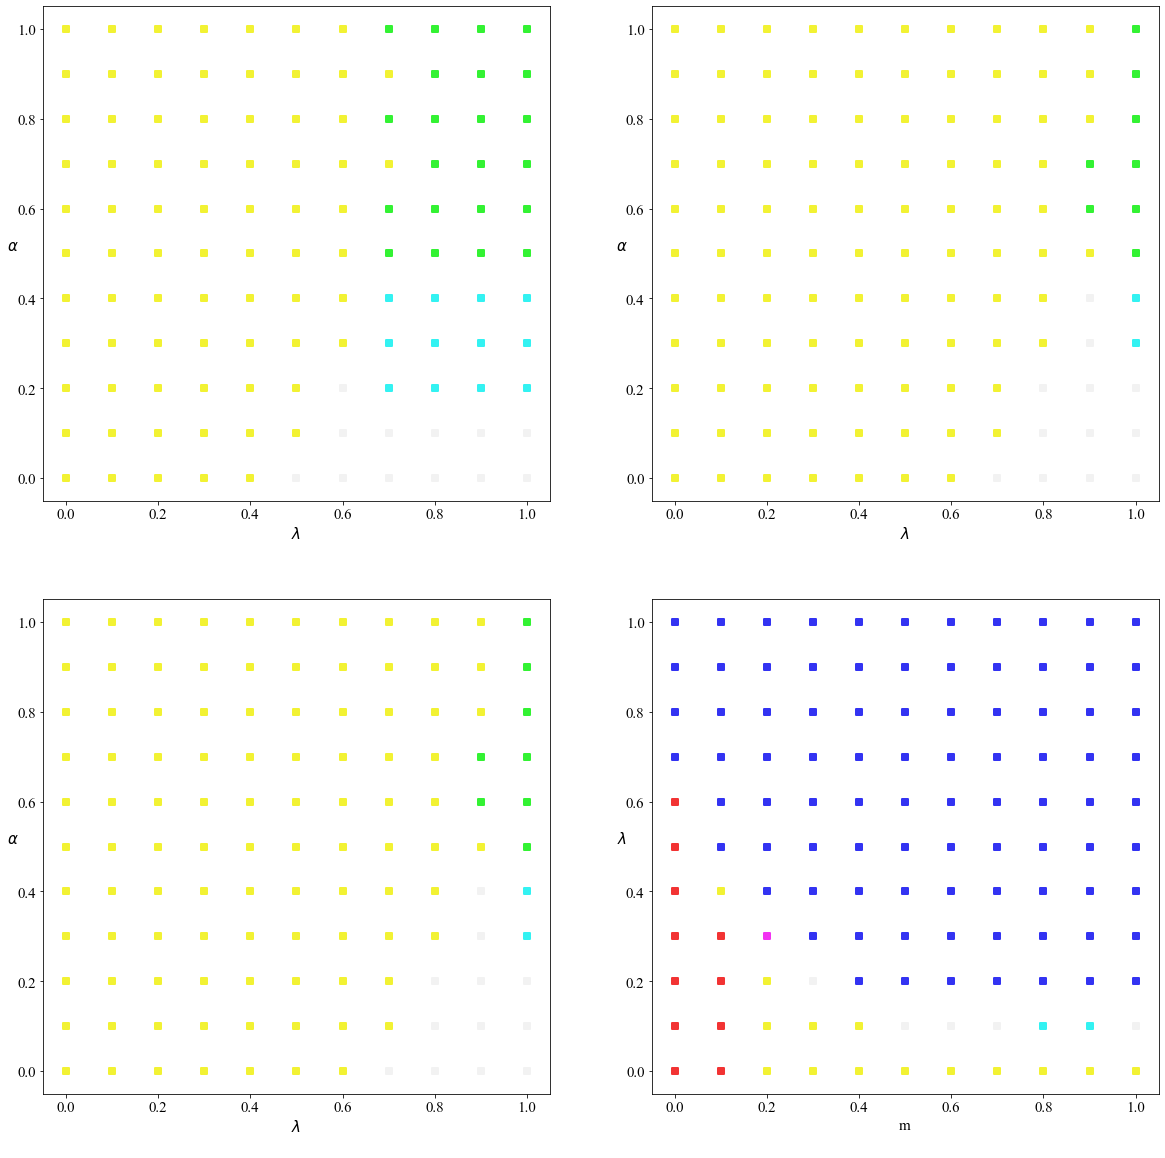

In [28]:
#one_graph(Data,[0,1,0,-1,-1,0],plt)
#Labels = ['$\alpha$','b',\lambda,'m',\delta$,'r']    

fig, axs = plt.subplots(2,2)
one_graph(Data,[-1,1.2,-1,0.2,0.1,0.5],axs[0,0])
#one_graph(Data,[-1,1.25,-1,0.25,0,0.5],axs[0,0])

one_graph(Data,[-1,1.4,-1,0.2,0.1,0.5],axs[0,1])
one_graph(Data,[-1,1.4,-1,0.2,0.1,0.5],axs[1,0])
one_graph(Data,[0,1,-1,-1,0.1,0.5],axs[1,1])



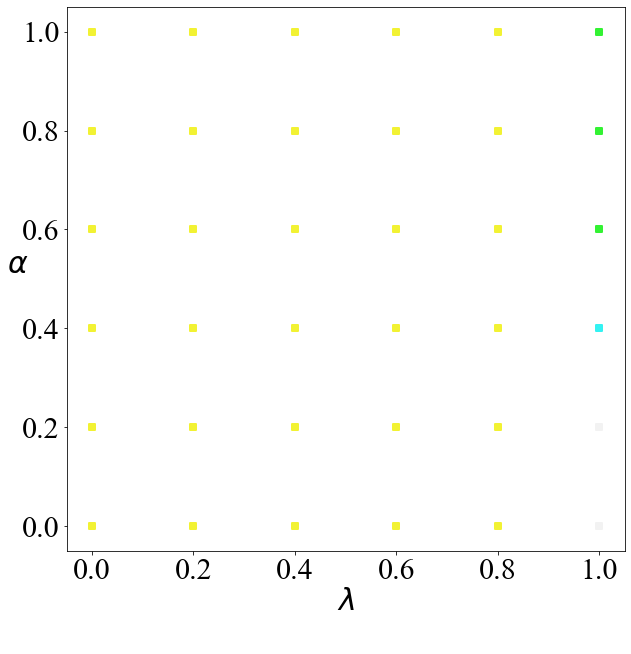

In [14]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 30})
fig, axs = plt.subplots(1)
one_graph(Data,[-1,1.4,-1,0.2,0.1,0.5],axs)
plt.savefig('Clear.png', dpi=500)
plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams.update({'font.size': 15})


In [5]:
def all_five(Data,info):
    Labels = [r'$\alpha$','b',r'$\lambda$','m',r'$\delta$','r']    
    #info = [-1,-1,-1,a,b,-1]
    fig = plt.figure()
    gs = fig.add_gridspec(5, 5, hspace=0.02, wspace=0.02)
    axs = gs.subplots(sharex='col', sharey='row')
        
    last_two = [index for index,value in enumerate(info) if value == -1][-2:]

    for i in range(5):
        for j in range(5):
            new_info = info.copy()
            new_info[last_two[0]] = i * 0.25
            new_info[last_two[1]] = j * 0.25
            need_x = (i == 4)
            need_y = (j == 0)
            
            y_info = Labels[last_two[0]] + '=' + str(i * 0.25)
            x_info = Labels[last_two[1]] + '=' + str(j * 0.25)
            
            one_graph(Data,new_info,axs[i,j],need_x, need_y,x_info, y_info)
    

In [50]:
def all_six(Data,info):
    Labels = [r'$\alpha$','b',r'$\lambda$','m',r'$\delta$','r']    
    #info = [-1,-1,-1,a,b,-1]
    fig = plt.figure()
    gs = fig.add_gridspec(6, 6, hspace=0.01, wspace=0.01)
    axs = gs.subplots(sharex='col', sharey='row')
        
    last_two = [index for index,value in enumerate(info) if value == -1][-2:]
    num_list = [0,0.2,0.4,0.6,0.8,1.0]
    
    for i in range(6):
        for j in range(6):
            new_info = info.copy()
            new_info[last_two[0]] = num_list[i]
            new_info[last_two[1]] = num_list[j]
            need_x = (i == 5)
            need_y = (j == 0)
            
            y_info = Labels[last_two[0]] + '=' + '{:1.1f}'.format(num_list[i])
            x_info = Labels[last_two[1]] + '=' + '{:1.1f}'.format(num_list[j])
            
            one_graph(Data,new_info,axs[i,j],need_x, need_y,x_info, y_info)

In [13]:
def all_ten(Data,info):
    grid_siz = 11
    Labels = [r'$\alpha$','b',r'$\lambda$','m',r'$\delta$','r']    
    #info = [-1,-1,-1,a,b,-1]
    fig = plt.figure()
    gs = fig.add_gridspec(grid_siz,grid_siz, hspace=0.01, wspace=0.01)
    axs = gs.subplots(sharex='col', sharey='row')
        
    last_two = [index for index,value in enumerate(info) if value == -1][-2:]
    
    num_list = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    
    for i in range(grid_siz):
        for j in range(grid_siz):
            new_info = info.copy()
            new_info[last_two[0]] = num_list[i]
            new_info[last_two[1]] = num_list[j]
            need_x = (i == 10)
            need_y = (j == 0)
            
            y_info = Labels[last_two[0]] + '=' + '{:1.1f}'.format(i * 0.1)
            x_info = Labels[last_two[1]] + '=' + '{:1.1f}'.format(j * 0.1)
            
            one_graph(Data,new_info,axs[i,j],need_x, need_y,x_info, y_info)

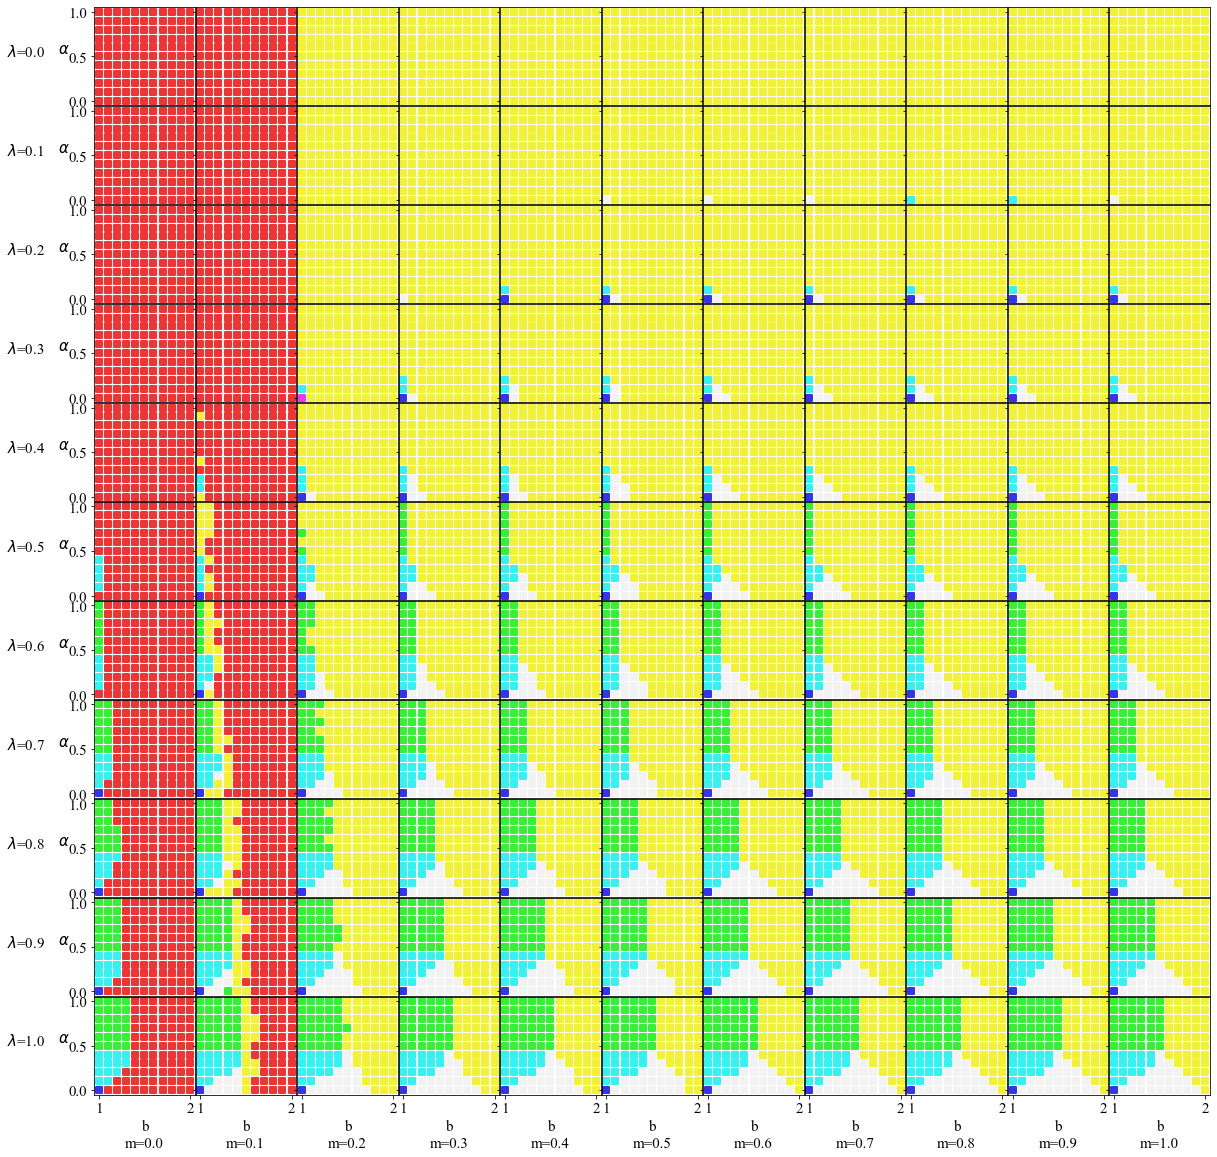

In [34]:
#[alpha, b, lambda, m, delta, rho]
D = 0.1
r = 0.5
info_list = [-1,-1,-1,-1,D,r]
all_ten(Data, info_list)
plt.savefig('Mixed_D{:03.0f}R{:03.0f}.png'.format(100*D,100*r), dpi=200)

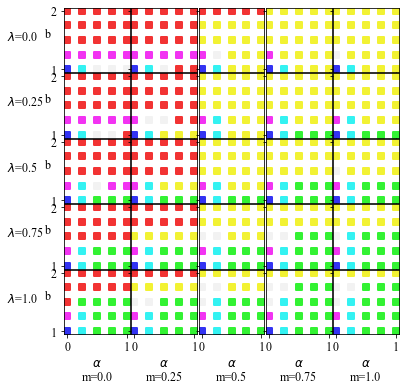

In [39]:
#[alpha, b, lambda, m, delta, rho]
D = 0.25
r = 0.5
info_list = [-1,-1,-1,-1,D,r]
all_five(Data, info_list)
plt.savefig('D{:03.0f}R{:03.0f}.png'.format(100*D,100*r), dpi=300)

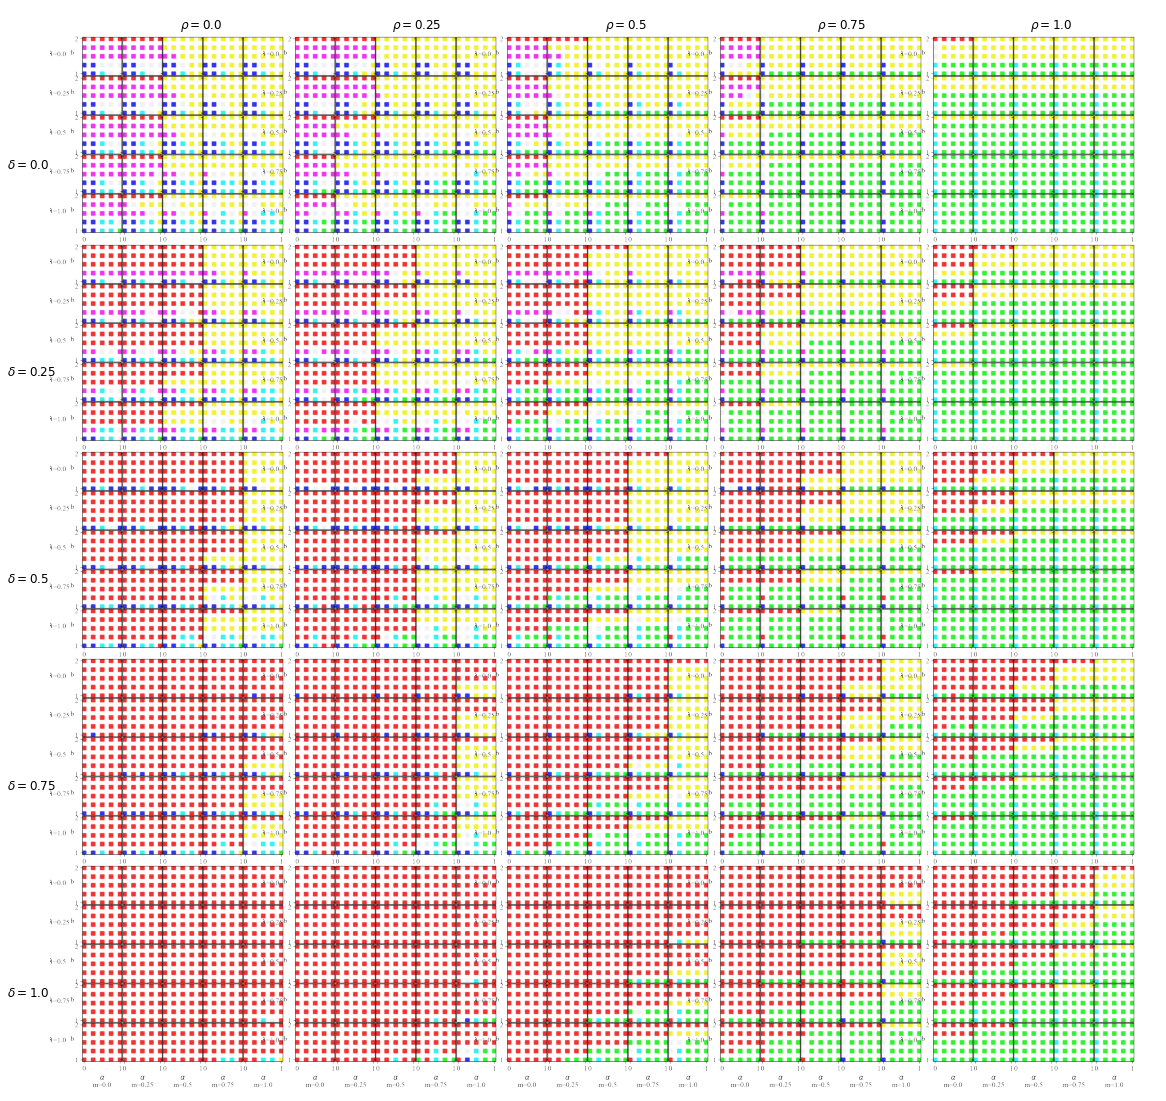

In [44]:
from PIL import Image
import matplotlib.image as mpimg

fig = plt.figure()
gs = fig.add_gridspec(5, 5, hspace=-0.2, wspace=-0.2)
axarr = gs.subplots(sharex='col', sharey='row')
for i in range(5):
    for j in range(5):
        image_data = mpimg.imread('ALL_Graph/D{:03d}R{:03d}.png'.format(25*i,25*j))
        
        axarr[i,j].imshow(image_data)
        if i == 0:
            axarr[i,j].text(600,100,r'$\rho = {}$'.format(0.25*j))
        if j == 0:
            axarr[i,j].text(-200,750,r'$\delta = {}$'.format(0.25*i))
        axarr[i,j].axis('off')
        
plt.savefig('All_gap025.png',dpi=300)
        

In [41]:
for d in range(5):
    for _r in range(5):
        D = d* 0.25
        r = _r * 0.25
        info_list = [-1,-1,-1,-1,D,r]
        all_five(Data, info_list)
        plt.savefig('D{:03.0f}R{:03.0f}.png'.format(100*D,100*r), dpi=200)
        plt.close()

In [6]:
def one_heat(Data,others, which_one, need_x = True,need_y =True, xinfo = '', yinfo = ''):
    Labels = [r'$\alpha$','b',r'$\lambda$','m',r'$\delta$',r'$\rho$']
    two_dim = [index for index,value in enumerate(others) if value == -1]  
    
    row = [] #First
    col = [] #Second
    for ind in Data:
        continue_next = False
        for i in range(len(others)):
            if others[i] != -1 and others[i] != ind[i]:
                continue_next = True
        if continue_next:
            continue
        if ind[two_dim[0]] not in row:
            row.append( ind[two_dim[0]] )
        if ind[two_dim[1]] not in col:
            col.append( ind[two_dim[1]] )
    
    row.sort(reverse=True)
    col.sort()
    data_mat = np.zeros( (len(row),len(col)) )
    
    
    for y in range(len(col)):
        for x in range(len(row)):
            ind = others.copy()
            ind[two_dim[0]] = row[x]
            ind[two_dim[1]] = col[y]
            val = Data[tuple(ind)][which_one]
            
            data_mat[x,y] = val
            
    col = np.array(col)
    row = np.array(row)
    
    fig = plt.figure()
    
    ax = fig.add_subplot(111)
    sh = ax.imshow(data_mat, interpolation='bilinear',cmap = 'jet',extent=[col[0],col[-1],row[-1],row[0] ])

    plt.xlabel(Labels[two_dim[1]])
    plt.ylabel(Labels[two_dim[0]])

    plt.colorbar(sh)

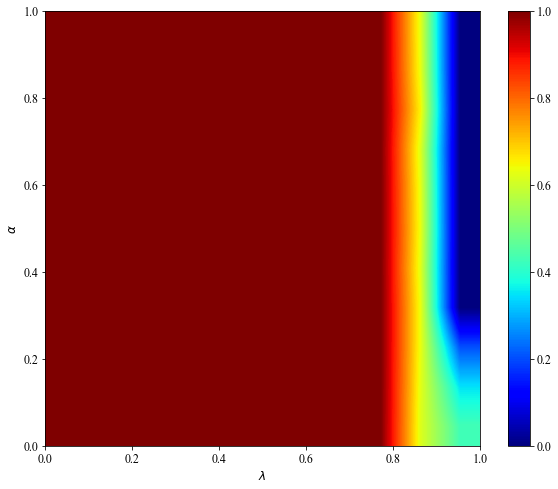

In [18]:
plt.rcParams["figure.figsize"] = (10,8)

info_list = [-1,1.5,-1,0.2,0.1,0.5]

one_heat(Data,info_list, 0)
plt.savefig('b015_D.png', dpi=200)

##### fig = plt.figure()
ax = fig.add_subplot(111)

plt.rcParams["figure.figsize"] = (3,3)

one_graph(Data,[-1,1.3,-1,0.2,0.1,0.5],ax)


